In [10]:
import scipy as sp
import scipy.stats
sp.stats.binom_test(7, 10)

0.3437499999999999

In [11]:
N1 = 10
pvalues1 = np.array([sp.stats.binom_test(n, N1) for n in range(N1 + 1)]) 
fair_range1, = np.where(pvalues1 > 0.1)
fair_start1, fair_end1 = fair_range1[0], fair_range1[-1]
print("N={}일 때 공정한 경우: 앞면이 나온 횟수가 {}~{}일 때"\
.format(N1, fair_start1, fair_end1))


N=10일 때 공정한 경우: 앞면이 나온 횟수가 2~8일 때


In [19]:
N1 = 10
p_val = np.array([sp.stats.binom_test(n, N1) for n in range(N1 + 1)])
fair_rag = np.where(p_val > 0.1)


In [36]:
N2 = 10
p_val2 = np.array([sp.stats.binom_test(n, N2) for n in range(N2 + 1)])
fair_range2 = np.where(p_val2 > 0.05)

In [17]:
N = 10
for n in range(N+1):
    x = sp.stats.binom_test(n, N)
    print(n, x)

0 0.001953125
1 0.021484374999999997
2 0.10937500000000003
3 0.3437499999999999
4 0.7539062500000002
5 1.0
6 0.7539062500000002
7 0.3437499999999999
8 0.10937500000000003
9 0.021484374999999997
10 0.001953125


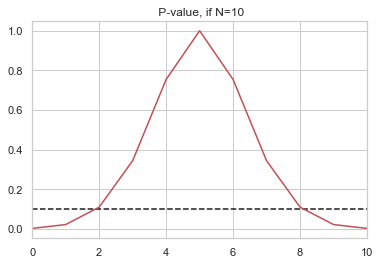

In [17]:
plt.plot(pvalues1, "r-")
plt.hlines(y=0.1, xmin=0, xmax=N1 + 1, ls="--") 
plt.xlim(0, N1)
plt.title(" P-value, if N={}".format(N1))
plt.show()
%matplotlib inline

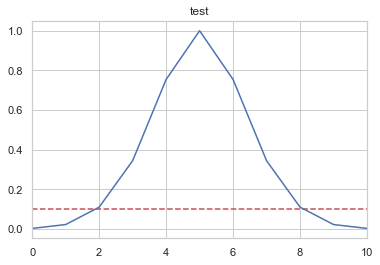

In [40]:
plt.plot(p_val, "b-")
plt.hlines(y = 0.1, xmin=0, xmax = N1 +1,colors='r', ls="--")
plt.xlim(0, N1)
plt.title('test')
plt.show()


In [41]:
import seaborn as sns
tips = sns.load_dataset("tips")

In [43]:

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [57]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


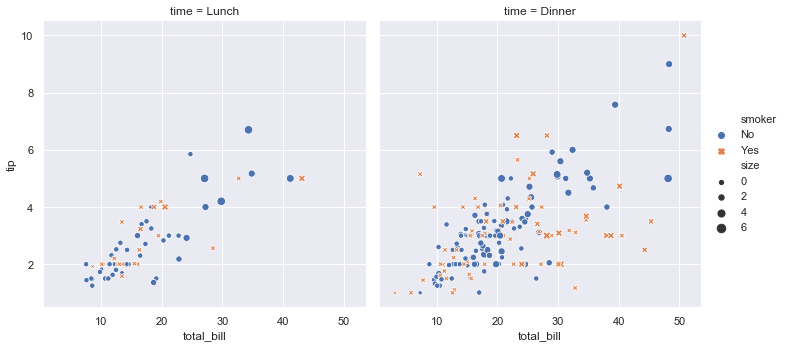

In [45]:
sns.set()
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

In [47]:
significance_level = 0.1

In [61]:
pivot_table(tips, index = ['sex'], columns=['sex'])


NameError: name 'pivot_table' is not defined

In [71]:
tips[tips.sex=='Female'].smoker.value_counts()

No     54
Yes    33
Name: smoker, dtype: int64

In [72]:
tips[tips.time=='dinner'].smoker.value_counts()

No     0
Yes    0
Name: smoker, dtype: int64

In [88]:
sp.stats.binom_test(54, 54+33, alternative='greater')

0.015709055116923068

In [80]:
tips[(tips.time=='Dinner') & (tips.sex=='Female')].smoker.value_counts()

No     29
Yes    23
Name: smoker, dtype: int64

In [85]:
sp.stats.binom_test(29, 29+23, alternative='greater')

0.2442278346899461

In [93]:
n = np.array([0, 3, 5, 2])
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

In [94]:
n2 = np.array([37, 32, 20, 11])
sp.stats.chisquare(n2)

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

In [96]:
n3 = np.array([0,0,0,0,0,5])
sp.stats.chisquare(n3)

Power_divergenceResult(statistic=25.000000000000004, pvalue=0.00013933379118562602)

In [101]:
n4 = np.array([[5, 15], [10, 20]])

In [102]:
sp.stats.chi2_contingency(n4)

(0.0992063492063492,
 0.7527841326498471,
 1,
 array([[ 6., 14.],
        [ 9., 21.]]))

In [103]:
n5 = np.array([[4, 16, 20], [23, 18, 19]])

In [105]:
sp.stats.chi2_contingency(n5)[1]

0.00704786570249751

# entropy

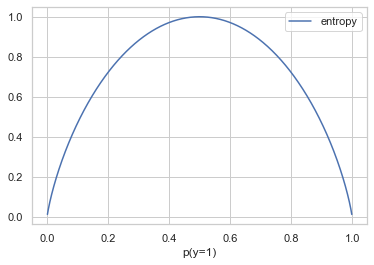

In [6]:
p0 = np.linspace(0.001, 1, 1000)
p1 = 1- p0
H = -p0 * np.log2(p0)- p1 * np.log2(p1)

plt.plot(p1, H, '-', label='entropy')
plt.legend()
plt.xlabel('p(y=1)')
plt.show()
%matplotlib inline

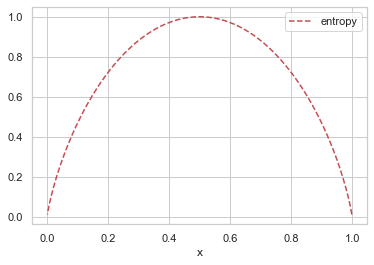

In [10]:
p0= np.linspace(0.001, 1, 1000)
p1 = 1-p0
H = - p0 * np.log2(p0) - p1 * np.log2(p1)

plt.plot(p1, H, "--", color = "r", label = "entropy")
plt.legend()
plt.xlabel("x")
plt.show()

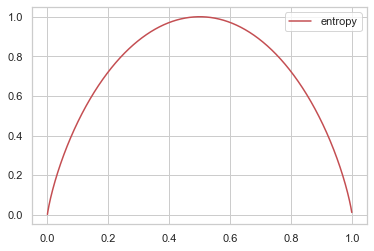

In [12]:
P0 = np.linspace(0.001, 1, 10000)
P1 = 1 - P0
H = -P0 * np.log2(P0) - P1 * np.log2(P1)

plt.plot(P1, H, color="r", label='entropy')
plt.legend()
plt.show()

In [15]:
P0 = 1/8
P1 = 1/8
P2 = 1/4
P3 = 1/2
H = - P0 * np.log2(P0) - P1 * np.log2(P1)- P2 * np.log2(P2)- P3 * np.log2(P3)
H

1.75

In [16]:
p = [0.5, 0.5]
sp.stats.entropy(p, base=2)

1.0

In [17]:
p = [30/40, 10/40]
sp.stats.entropy(p, base=2)

0.8112781244591328

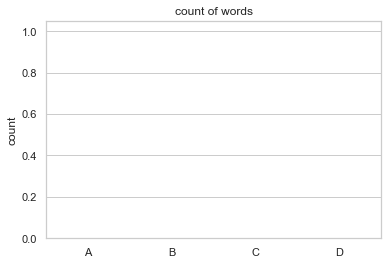

In [24]:
doc = ['ABBDABC']
sns.countplot(list(doc), order="ABCD")
plt.title("count of words")
plt.show()